In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

In [65]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
data_columns = data.columns.to_list()

null_performer = []
null_remove_column = []
null_replace_column = []

null_del_per = 30.0

print("Calculated Missing Value in Column")

for col in data_columns:
    miss_value = float(data["{}".format(col)].isnull().mean() * 100)

    if miss_value > 0.0:
        null_performer.append(col)
        print("{}=> {}%".format(col, "%.2f"%float(data["{}".format(col)].isnull().mean() * 100)))
    
    if miss_value > 0.0 and miss_value < null_del_per:
        null_replace_column.append(col)
    
    if miss_value >null_del_per:
        null_remove_column.append(col)

Calculated Missing Value in Column
LotFrontage=> 17.74%
Alley=> 93.77%
MasVnrType=> 0.55%
MasVnrArea=> 0.55%
BsmtQual=> 2.53%
BsmtCond=> 2.53%
BsmtExposure=> 2.60%
BsmtFinType1=> 2.53%
BsmtFinType2=> 2.60%
Electrical=> 0.07%
FireplaceQu=> 47.26%
GarageType=> 5.55%
GarageYrBlt=> 5.55%
GarageFinish=> 5.55%
GarageQual=> 5.55%
GarageCond=> 5.55%
PoolQC=> 99.52%
Fence=> 80.75%
MiscFeature=> 96.30%


In [67]:
num_category = [feature for feature in data.columns if data[feature].dtypes != "O"]

In [68]:
ignore_col = ["Id"]

for col in num_category:
    
    if col != ignore_col:
        lower_limit = data["{}".format(col)].mean() - 3 * data["{}".format(col)].std()
        upper_limit = data["{}".format(col)].mean() + 3 * data["{}".format(col)].std()
        print("{} => {} - {}".format(col, int(lower_limit), int(upper_limit)))

Id => -534 - 1995
MSSubClass => -70 - 183
LotFrontage => -2 - 142
LotArea => -19426 - 40460
OverallQual => 1 - 10
OverallCond => 2 - 8
YearBuilt => 1880 - 2061
YearRemodAdd => 1922 - 2046
MasVnrArea => -439 - 646
BsmtFinSF1 => -924 - 1811
BsmtFinSF2 => -437 - 530
BsmtUnfSF => -758 - 1892
TotalBsmtSF => -258 - 2373
1stFlrSF => 2 - 2322
2ndFlrSF => -962 - 1656
LowQualFinSF => -140 - 151
GrLivArea => -60 - 3091
BsmtFullBath => -1 - 1
BsmtHalfBath => 0 - 0
FullBath => 0 - 3
HalfBath => -1 - 1
BedroomAbvGr => 0 - 5
KitchenAbvGr => 0 - 1
TotRmsAbvGrd => 1 - 11
Fireplaces => -1 - 2
GarageYrBlt => 1904 - 2052
GarageCars => 0 - 4
GarageArea => -168 - 1114
WoodDeckSF => -281 - 470
OpenPorchSF => -152 - 245
EnclosedPorch => -161 - 205
3SsnPorch => -84 - 91
ScreenPorch => -152 - 182
PoolArea => -117 - 123
MiscVal => -1444 - 1531
MoSold => -1 - 14
YrSold => 2003 - 2011
SalePrice => -57406 - 419248


/home/ninja/anaconda3/envs/feature-engineering-webapp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtFinSF1'>

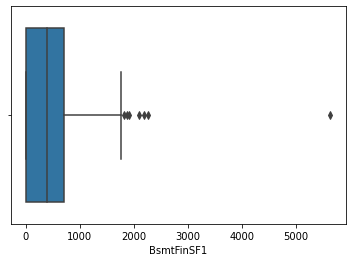

In [69]:
sns.boxplot( data["BsmtFinSF1"])

In [70]:
df = pd.read_csv("data/data2.csv")
df.dropna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df[["year", "km_driven"]],
    df['selling_price'],
    test_size=0.2,
    random_state=0)

In [72]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest

In [73]:
algo = "r"

if algo == "r":
    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
    
else:
    selected_top_columns = SelectKBest(mutual_info_classif, k=5)

selected_top_columns.fit(X_train, y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['year'], dtype='object')